In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Preprocessing Testing Dataset

Setting Testing dataset as per Training dataset to test the model.

In [5]:
ds_test=pd.read_csv('bigdatamart_test.csv')
ds_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
ds_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

It can be seen that Column Item_Weight & Outlet_Size has missing values. Lets fill some data in missing values.

In [9]:
ds_test['Item_Weight'].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

We can fill missing data in Item_Weight with mean of Item_Weight.

In [11]:
ds_test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

It can be seen that Column Outlet_Size has Medium with higher number of instances So we can fill NaN values with Medium.

In [12]:
# Filling data as per above observations
ds_test['Item_Weight'].fillna(ds_test['Item_Weight'].mean(),inplace = True)
ds_test['Outlet_Size'].fillna('Medium',inplace = True)

In [13]:
ds_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [14]:
ds_test['Item_Visibility'].value_counts()

0.000000    353
0.107493      2
0.159518      2
0.026711      2
0.056306      2
           ... 
0.053802      1
0.101626      1
0.091380      1
0.060802      1
0.050289      1
Name: Item_Visibility, Length: 5277, dtype: int64

There are 353 instances with 0 values, Item_Visibility cannot be 0, so fill 0 values with mean of Columns.

In [15]:
ds_test['Item_Visibility'].replace(0.000000,ds_test['Item_Visibility'].mean(),inplace = True)

In [16]:
ds_test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

Following multiple categories are there in column Item_Fat_Content:

1) 'Low Fat' , 'LF' ,' low Fat'- need to set these as Low Fat
2) Regular,reg - need to set these as Regular

In [17]:
#Replacing the above values.
ds_test['Item_Fat_Content'].replace(['low fat','reg','LF'],['Low Fat','Regular','Low Fat'],inplace=True)

In [18]:
# Rechecking the Columns after replacement
ds_test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [20]:
# Checking unique values in Item_Type
ds_test['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [21]:
ds_test['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [22]:
ds_test['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder 

le= LabelEncoder()

In [28]:
col = ds_test[['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP',
                'Outlet_Identifier','Outlet_Establishment_Year' , 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

for i in col:
    ds_test[i] = le.fit_transform(ds_test[i])

In [29]:
ds_test.skew()

Item_Identifier             -0.000020
Item_Weight                 -1.357647
Item_Fat_Content             0.609223
Item_Visibility             -0.046689
Item_Type                    0.096486
Item_MRP                     0.019932
Outlet_Identifier           -0.060209
Outlet_Establishment_Year    0.034635
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

Considering normal skewness = +/- 0.50 

It can be seen from above that Item_Weight, Item_Fat_Content & Outlet_Type are highly skewed. We need to bring it to normal. 

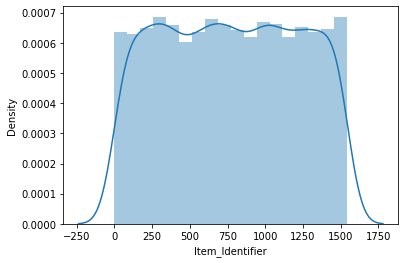

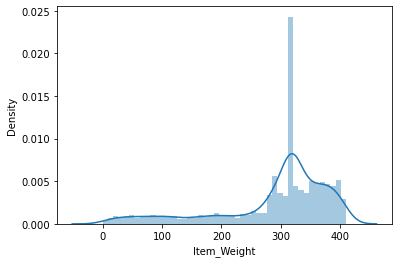

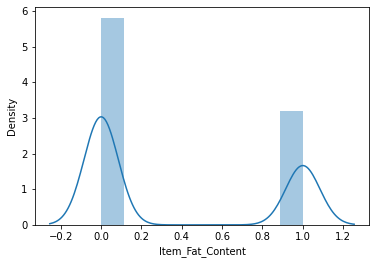

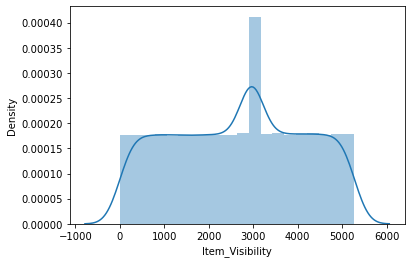

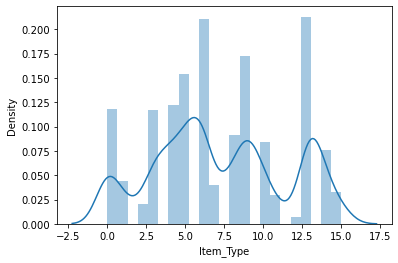

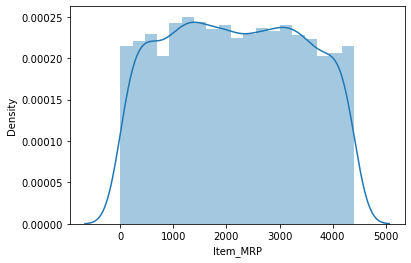

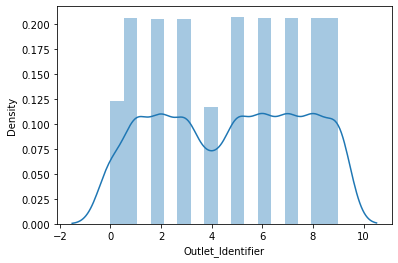

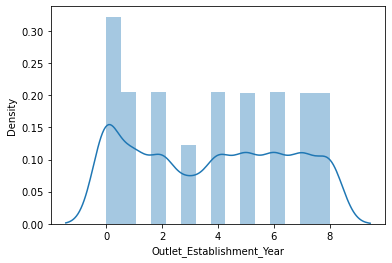

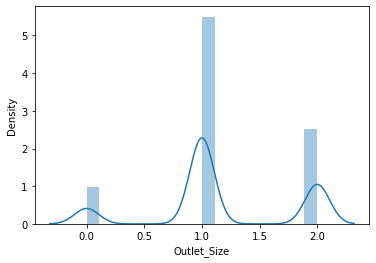

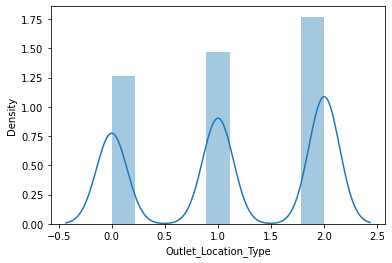

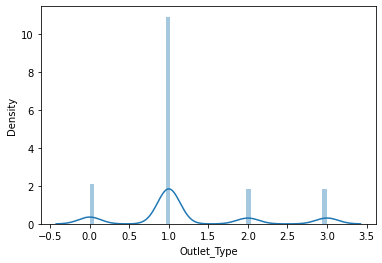

In [30]:
i=ds_test.columns
for i in i:
    sns.distplot(ds_test[i])
    plt.show()

In [32]:
ds_train= pd.read_csv('bigdatamart_train.csv')

In [39]:
train = pd.read_csv('bigdatamart_train.csv')
test = pd.read_csv('bigdatamart_test.csv')

In [40]:
x=test.iloc[:,0:12]

In [41]:
y=train.iloc[:,-1]

In [42]:
from sklearn.preprocessing import power_transform

In [43]:
x=power_transform(x,method = 'yeo-johnson')

ValueError: could not convert string to float: 'FDW58'

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [37]:
sc = StandardScaler()

x=sc.fit_transform(x)

lr=LinearRegression()

In [38]:
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu *100} found on random_state {best_rstate}")

ValueError: Found input variables with inconsistent numbers of samples: [5681, 8523]